In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/python2/2.7.8/x86_64/gcc46/nonet/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
os.chdir('/data/lola/shockle/data_for_paper_attempt2/no_pymc')

In [3]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_12chain_'+str(trace)+'_sampled_params_chain_0.npy')]
    traces[trace][0] = np.concatenate((traces[trace][0], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_sampled_params_chain_0.npy')), axis=0)
    for chain in range(1, 12):
        traces[trace].append(np.load('earm_dreamz_12chain_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))
        traces[trace][chain] = np.concatenate((traces[trace][chain], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_sampled_params_chain_'+str(chain)+'.npy')), axis=0)
    

In [4]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_12chain_'+str(trace)+'_logps_chain_0.npy')]
    logps[trace][0] = np.concatenate((logps[trace][0], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_logps_chain_0.npy')), axis=0)
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 12):
        logps[trace].append(np.load('earm_dreamz_12chain_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        logps[trace][chain] = np.concatenate((logps[trace][chain], np.load('earm_dreamzs_12chain_'+str(trace)+'_2_logps_chain_'+str(chain)+'.npy')), axis=0)
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-821264.33286055]
 [-821264.33286055]
 [-821264.0585526 ]
 ..., 
 [  -4976.66249989]
 [  -4976.3245805 ]
 [  -4976.3245805 ]]
Logp of trace:  a  chain:  1  =  [-4976.38118657]
Logp of trace:  a  chain:  2  =  [-4980.15044619]
Logp of trace:  a  chain:  3  =  [-4974.1533938]
Logp of trace:  a  chain:  4  =  [-4980.13287244]
Logp of trace:  a  chain:  5  =  [-4981.79732379]
Logp of trace:  a  chain:  6  =  [-4975.26022055]
Logp of trace:  a  chain:  7  =  [-4981.04469638]
Logp of trace:  a  chain:  8  =  [-4976.36831679]
Logp of trace:  a  chain:  9  =  [-4971.56460573]
Logp of trace:  a  chain:  10  =  [-4980.99504885]
Logp of trace:  a  chain:  11  =  [-4958.27753136]
Logp of trace:  b  chain: 0 =  [[-784988.28242683]
 [-727182.5888335 ]
 [-727182.5888335 ]
 ..., 
 [  -4868.28589796]
 [  -4868.28589796]
 [  -4868.28589796]]
Logp of trace:  b  chain:  1  =  [-4884.55215283]
Logp of trace:  b  chain:  2  =  [-4933.14470219]
Logp of trace:  b  chain:  3  =

In [5]:
from earm_exp_parameters import earm_rates
uni_idx = []
norm_idx = []
uni_n = 0
norm_n = 0
for i, param in enumerate(model.parameters_rules()):
    if earm_rates[param.name]['type'] == 'uniform':
        uni_idx.append(i)
        uni_n += 1
    elif earm_rates[param.name]['type'] == 'normal':
        norm_idx.append(i)
        norm_n += 1

kf mito:  -14.8452186131  -  0.154781386928
kr mito:  -4.15478138693  -  13.8452186131
kf cyto:  -16.0001205731  -  -1.00012057306
kr cyto:  -2.99987942694  -  15.0001205731


In [6]:
traces['b'][0][:,72]

array([-10.6466023 , -10.4947072 , -10.4947072 , ...,  -8.35405317,
        -8.35405317,  -8.35405317])

In [7]:
traces['a'][0][:,72]

array([-7.31496758, -7.31496758, -7.06640178, ..., -9.09548405,
       -9.09548405, -9.09548405])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    uni_param_n = 0
    norm_param_n = uni_n
    for i, param in enumerate(model.parameters_rules()):
        if i in uni_idx:
            param_trace_dict_a[param.name] = [traces[run][chain][:,uni_param_n] for chain in range(len(traces[run]))]
            uni_param_n += 1
        else:
            param_trace_dict_a[param.name] = [traces[run][chain][:,norm_param_n] for chain in range(len(traces[run]))]
            norm_param_n += 1
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  98  of  105  parameters.
Percent of parameters with GR below 1.2:  93.3333333333
Number of parameters with GR below 1.1:  96  of  105  parameters.
Percent of parameters with GR below 1.1:  91.4285714286


[98, 93.33333333333333, 96, 91.42857142857143]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  104  of  105  parameters.
Percent of parameters with GR below 1.2:  99.0476190476
Number of parameters with GR below 1.1:  93  of  105  parameters.
Percent of parameters with GR below 1.1:  88.5714285714


[104, 99.04761904761905, 93, 88.57142857142857]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  100  of  105  parameters.
Percent of parameters with GR below 1.2:  95.2380952381
Number of parameters with GR below 1.1:  93  of  105  parameters.
Percent of parameters with GR below 1.1:  88.5714285714


[100, 95.23809523809523, 93, 88.57142857142857]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  100  of  105  parameters.
Percent of parameters with GR below 1.2:  95.2380952381
Number of parameters with GR below 1.1:  93  of  105  parameters.
Percent of parameters with GR below 1.1:  88.5714285714


[100, 95.23809523809523, 93, 88.57142857142857]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-8.63756341, -8.63756341, -8.63756341, ..., -7.34136038,
        -7.34136038, -7.34136038]),
 array([-7.88994328, -7.88994328, -7.78781191, ..., -7.28525642,
        -7.28525642, -7.28525642]),
 array([-7.88994328, -7.88994328, -7.67526846, ..., -8.37873491,
        -8.37873491, -8.37873491]),
 array([-7.88994328, -7.88994328, -7.88994328, ..., -7.59811715,
        -7.59811715, -7.59811715]),
 array([-7.88994328, -7.88994328, -7.88994328, ..., -7.95727101,
        -7.95727101, -7.95727101]),
 array([-7.88994328, -7.98285142, -7.98285142, ..., -7.64023852,
        -7.64023852, -7.64023852]),
 array([-7.88994328, -8.20326645, -8.20326645, ..., -7.4556069 ,
        -7.4556069 , -7.4556069 ]),
 array([-7.88994328, -7.88994328, -7.53766675, ..., -9.42135914,
        -9.42135914, -9.42135914]),
 array([-7.88994328, -7.88994328, -7.96446398, ..., -8.72740646,
        -8.72740646, -8.72740646]),
 array([-7.88994328, -8.34855601, -8.34855601, ..., -6.4554257 ,
        -6.4554257 , -6.45

120000
12
120000


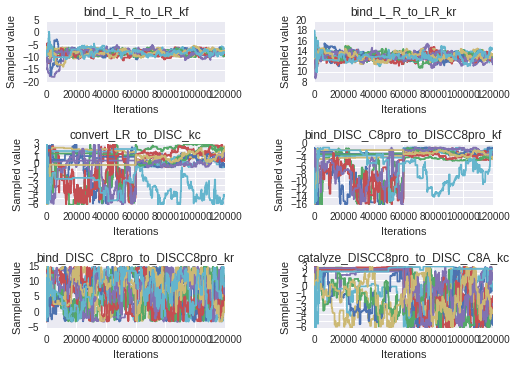

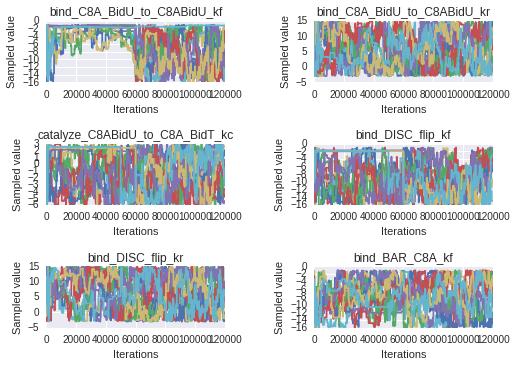

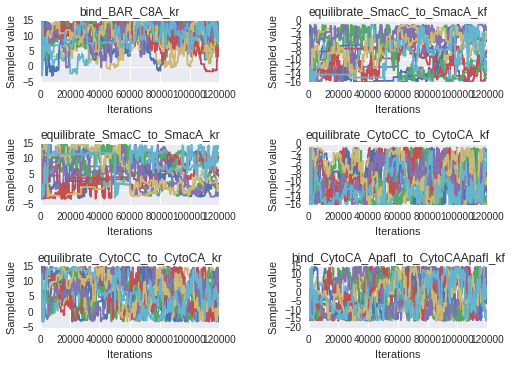

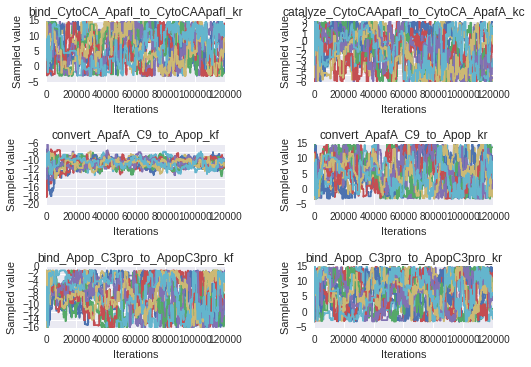

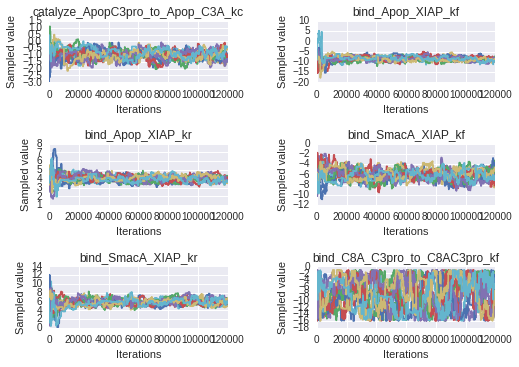

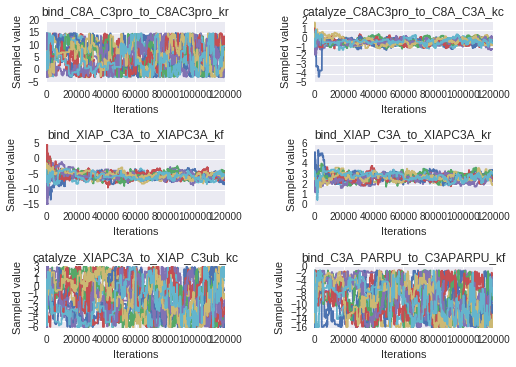

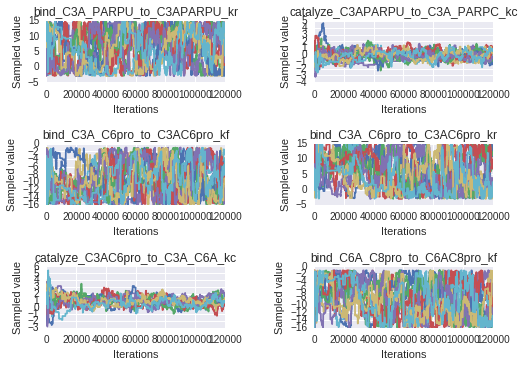

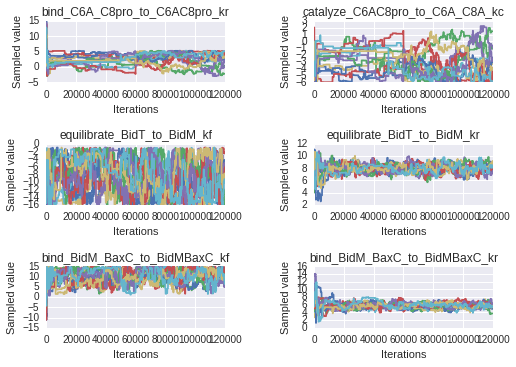

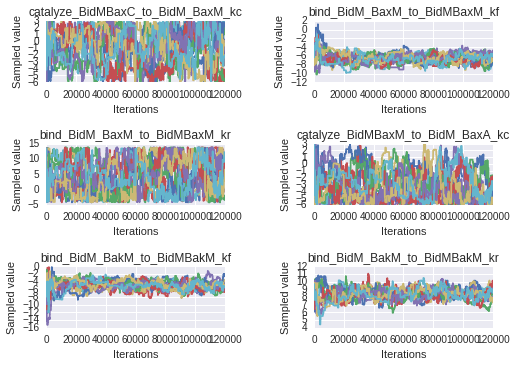

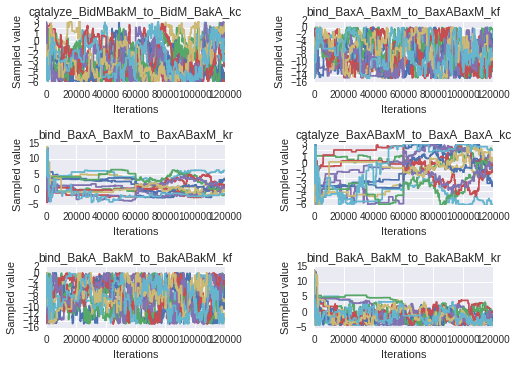

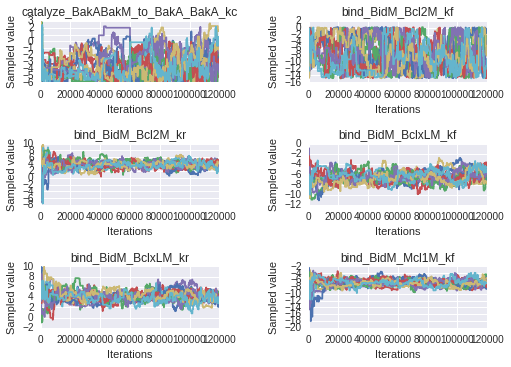

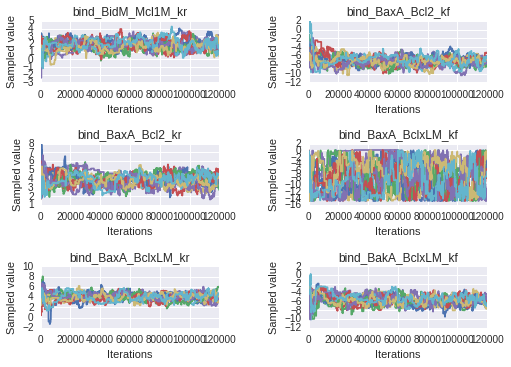

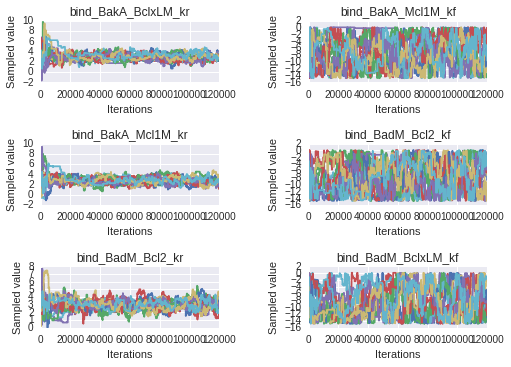

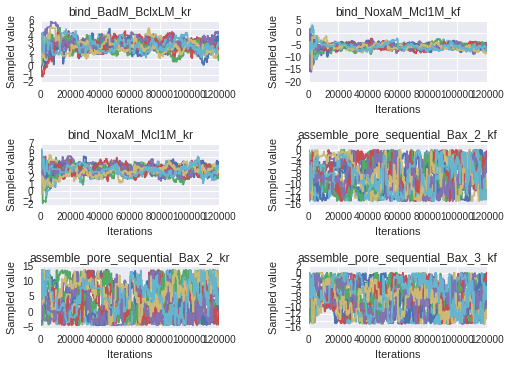

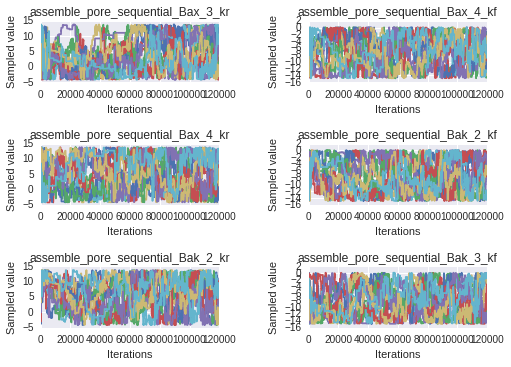

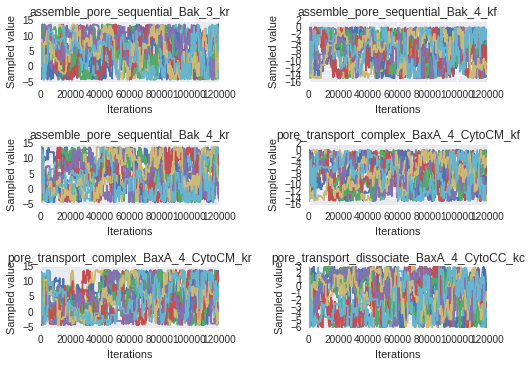

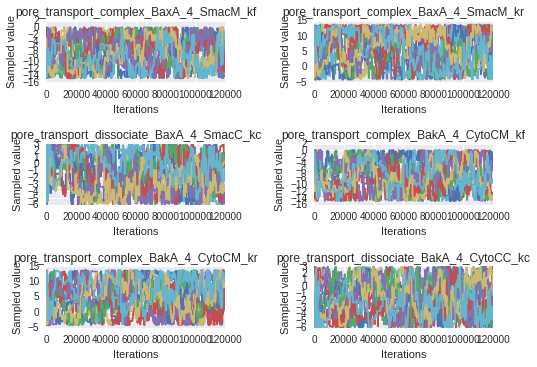

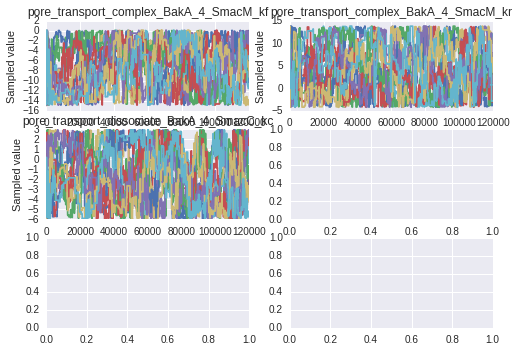

In [14]:
sample_plots(param_trace_dicts['a'])

In [19]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=30000, thin=100)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=30000, thin=100)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=30000, thin=100)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=30000, thin=100)

In [16]:
trace_arrays = [trace_arr_a, trace_arr_b, trace_arr_c, trace_arr_d]

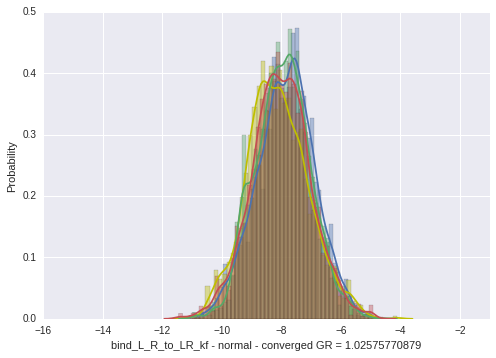

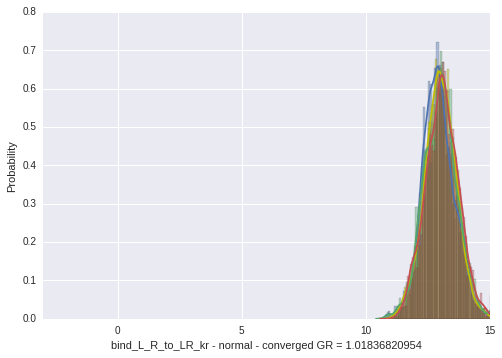

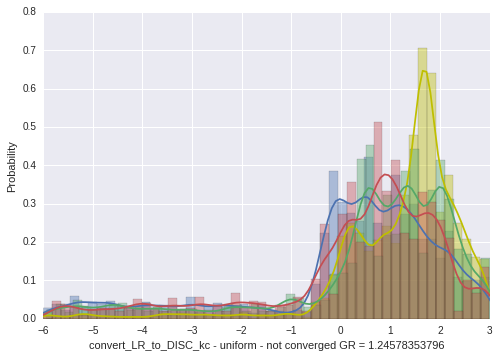

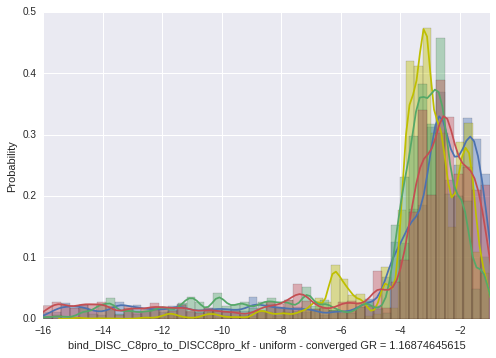

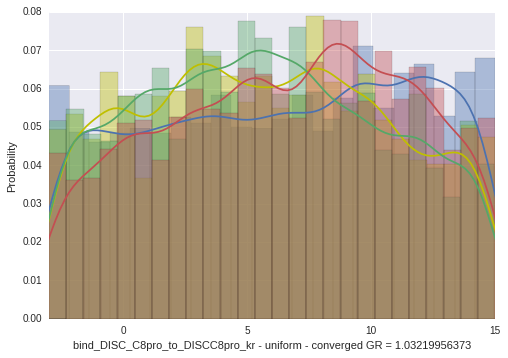

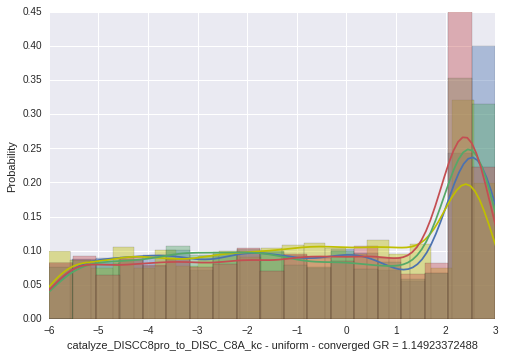

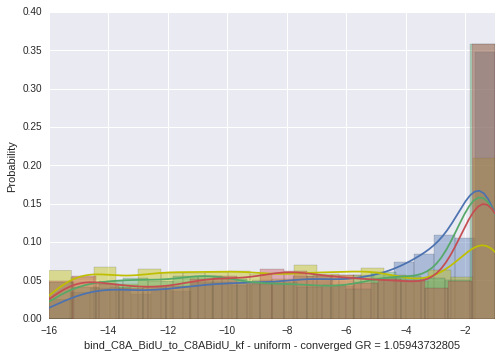

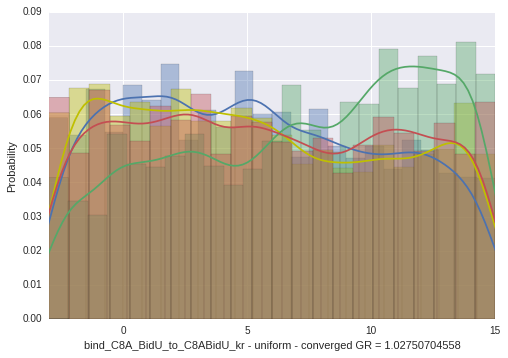

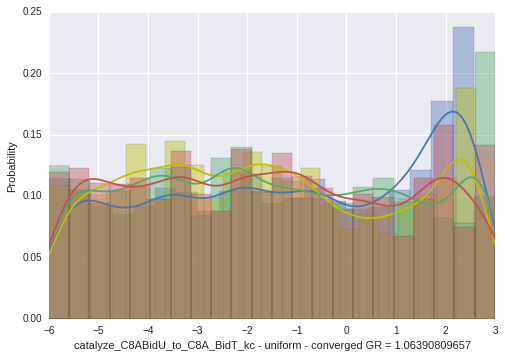

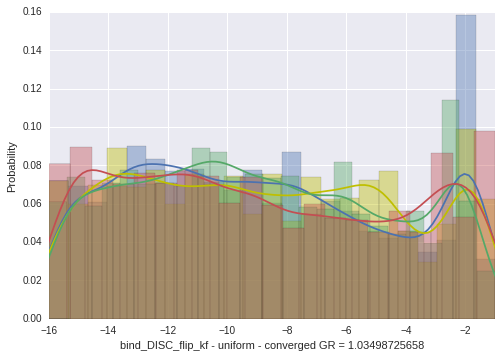

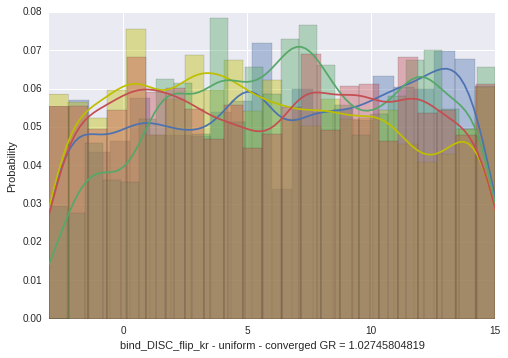

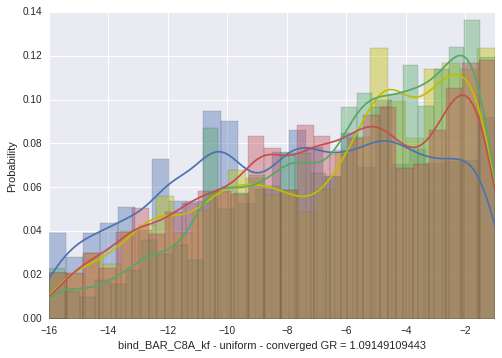

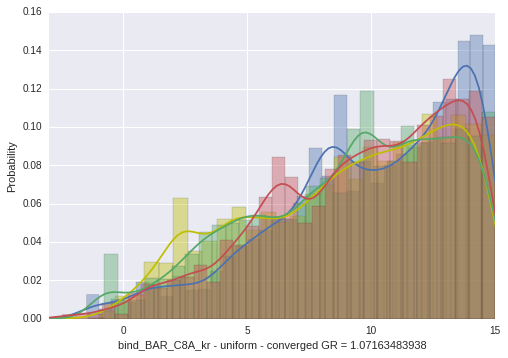

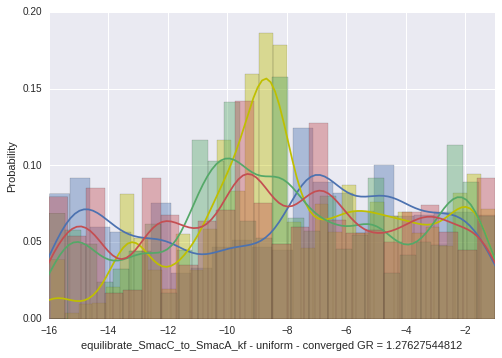

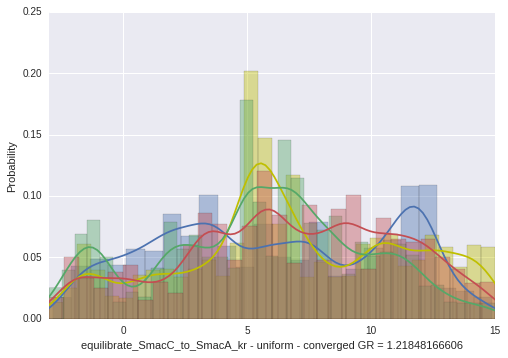

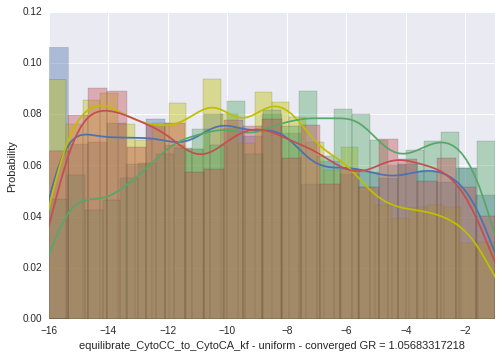

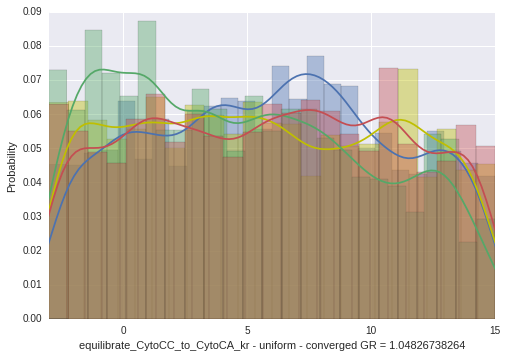

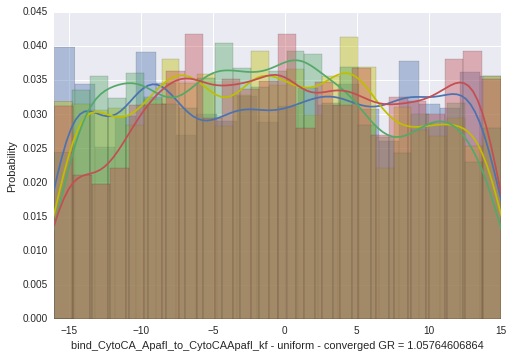

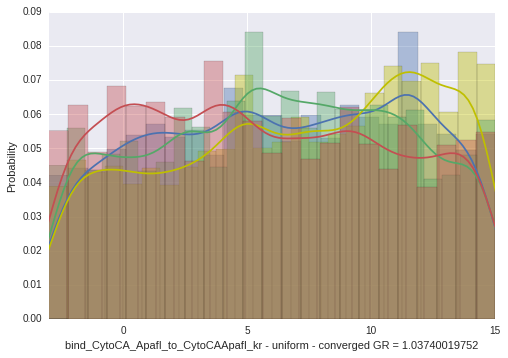

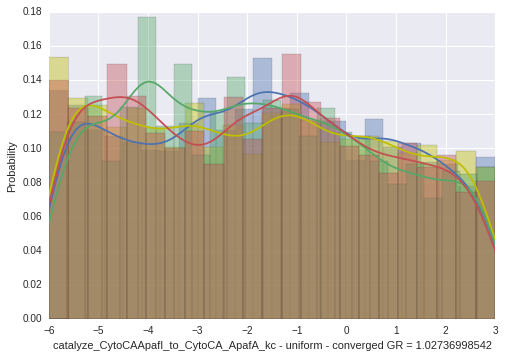

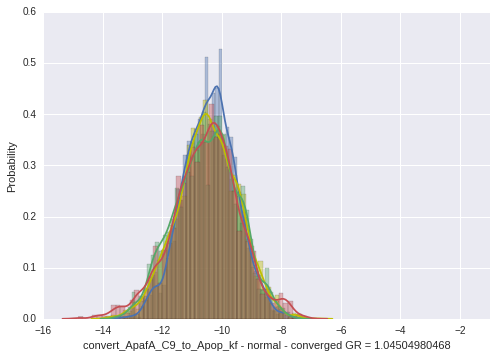

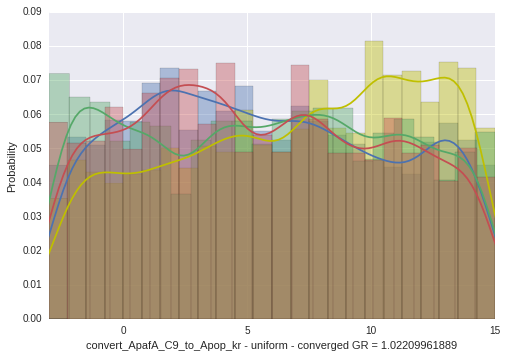

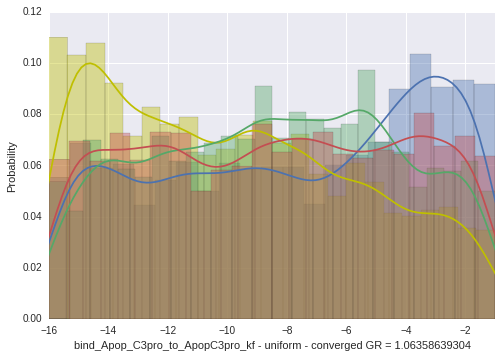

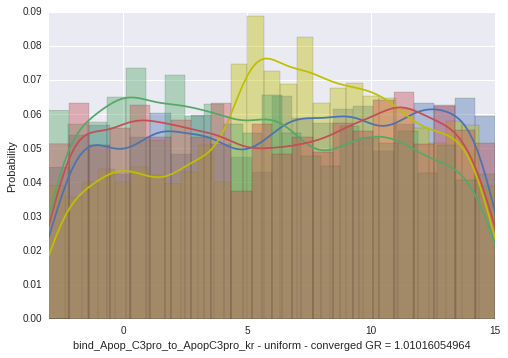

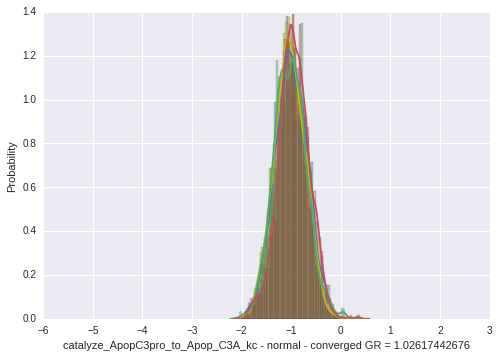

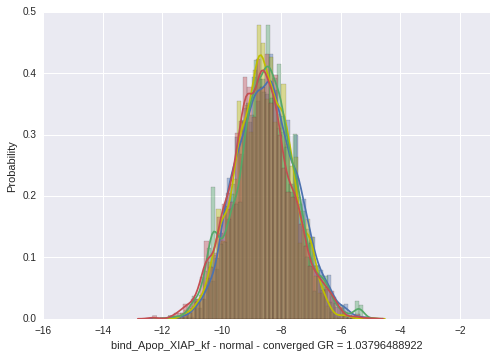

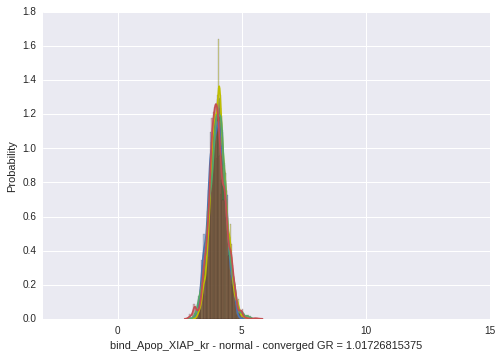

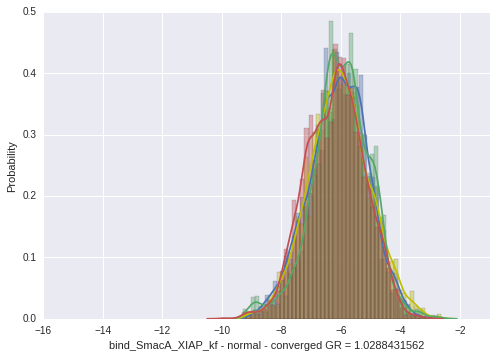

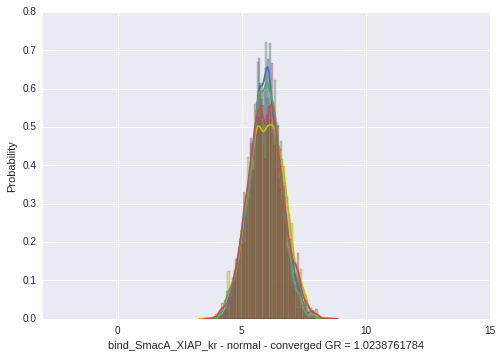

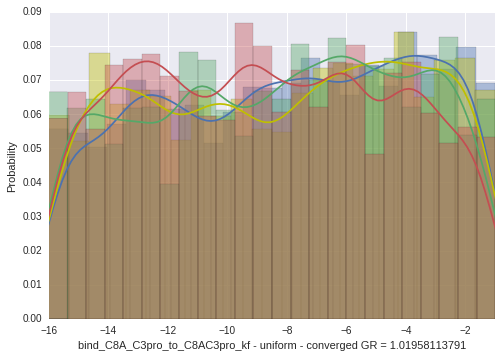

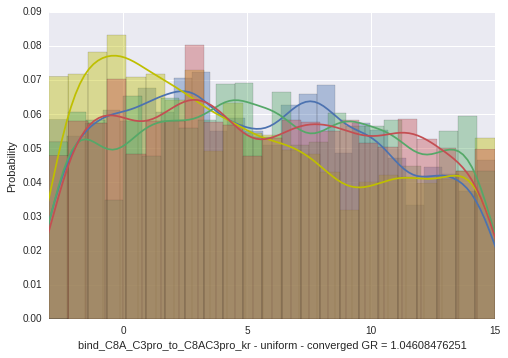

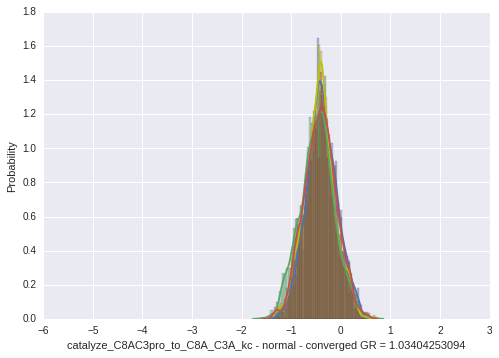

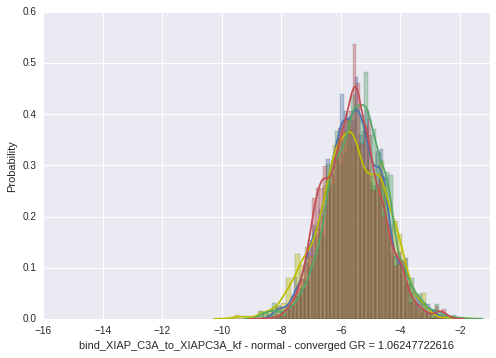

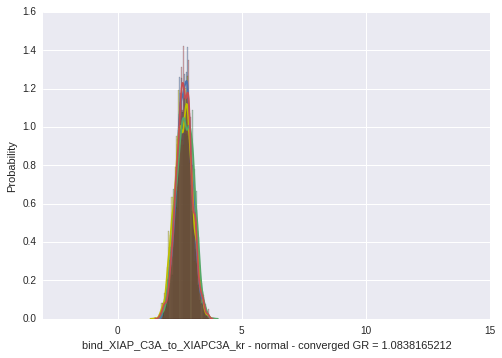

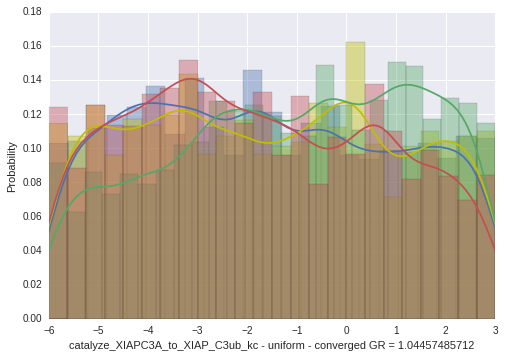

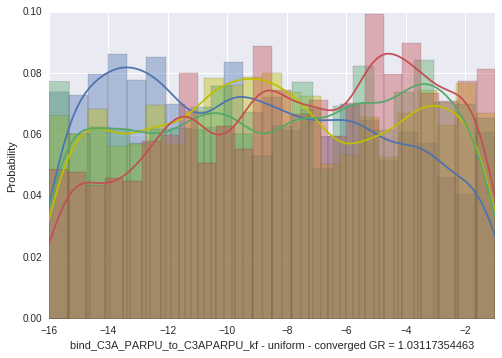

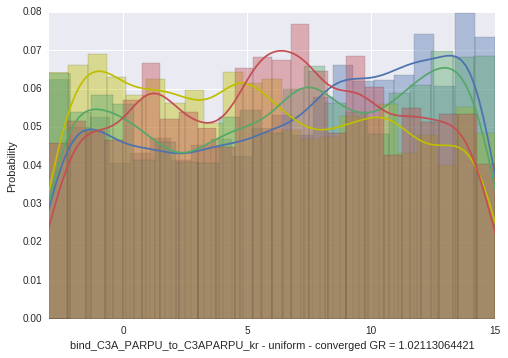

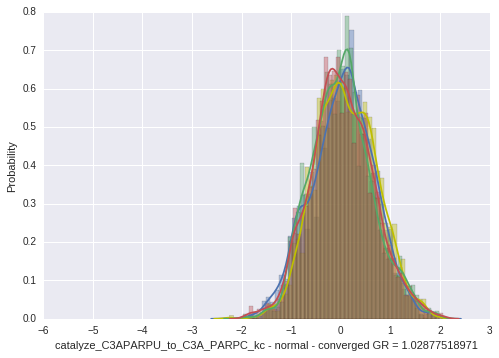

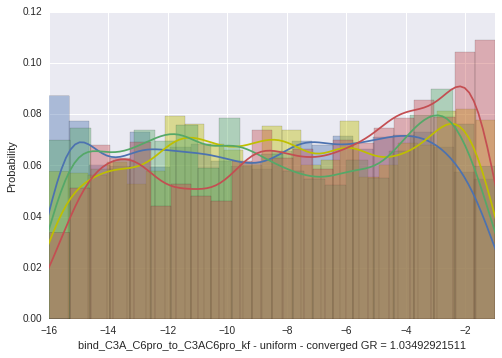

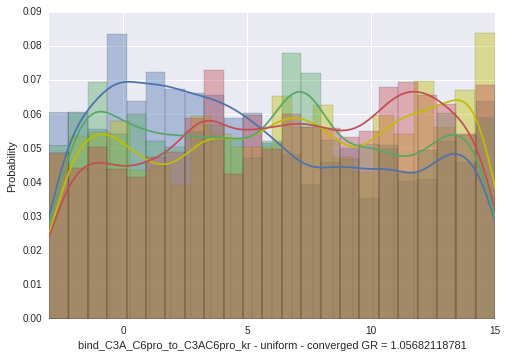

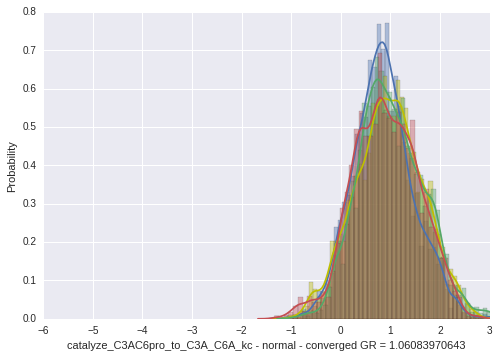

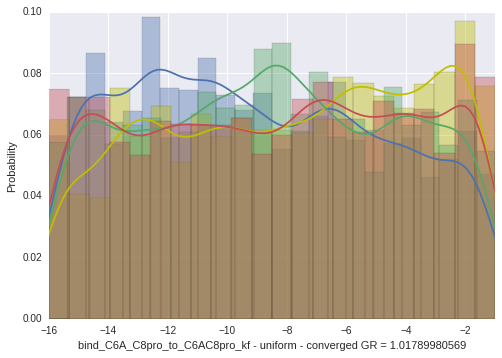

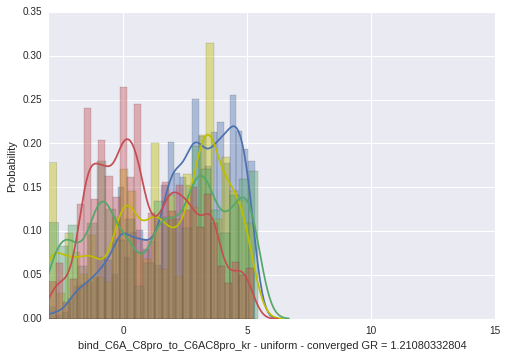

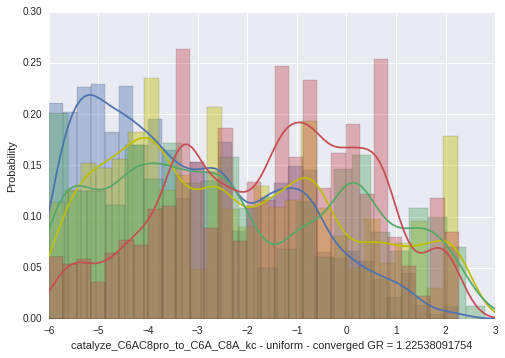

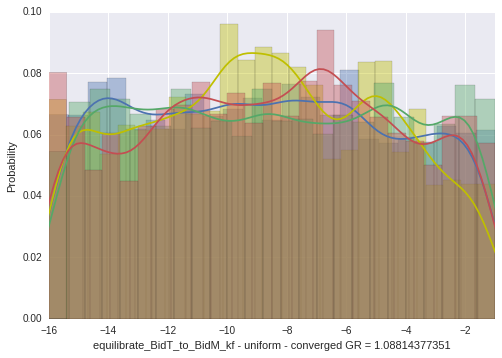

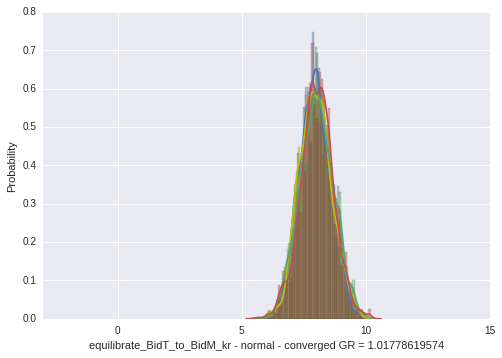

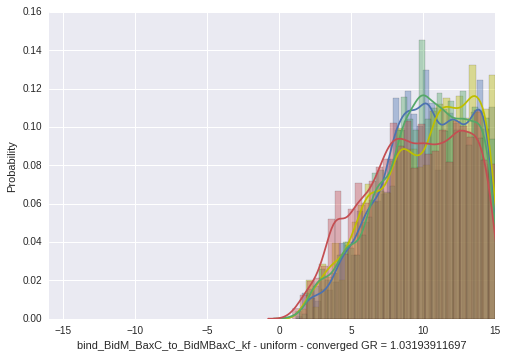

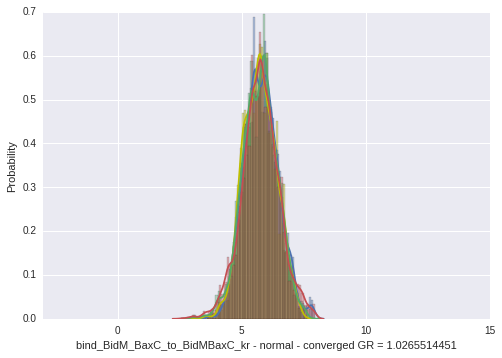

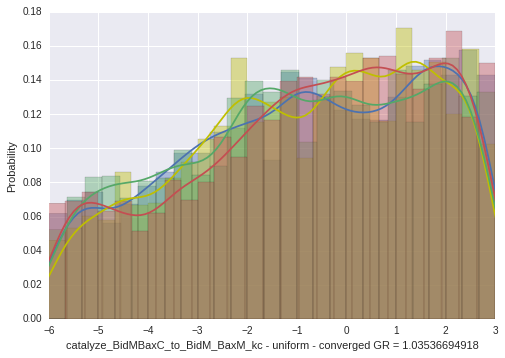

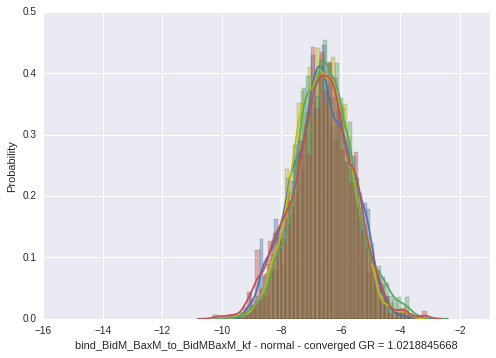

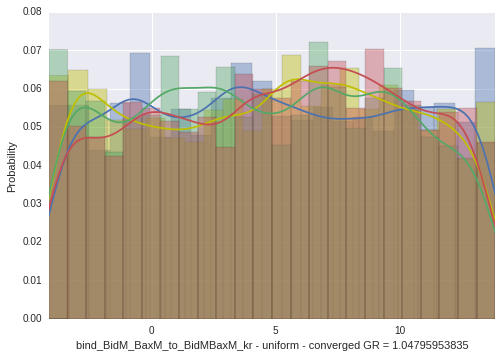

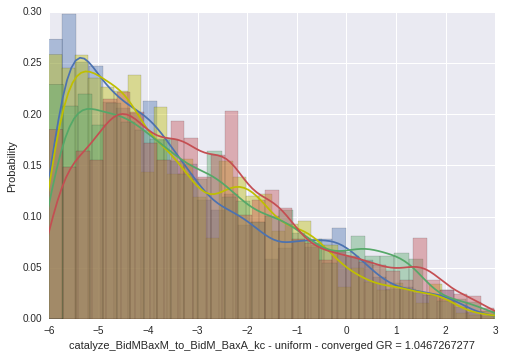

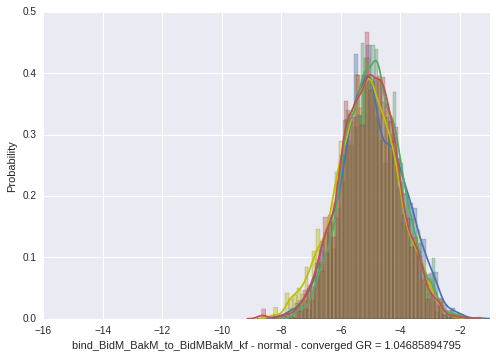

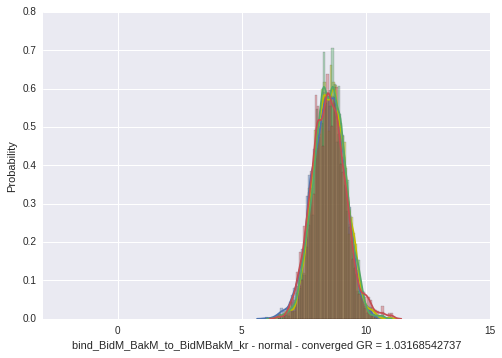

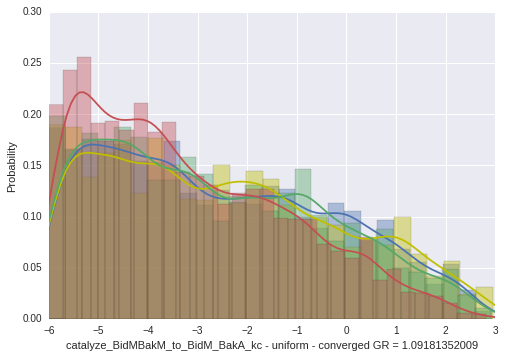

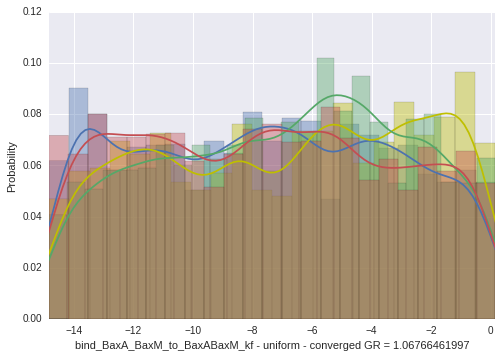

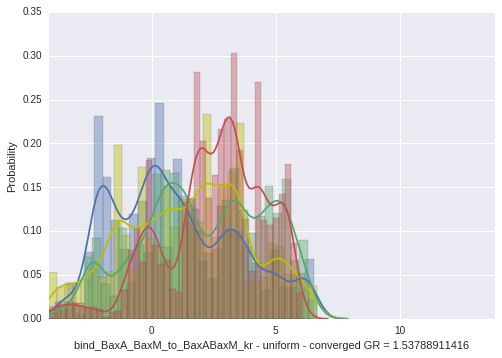

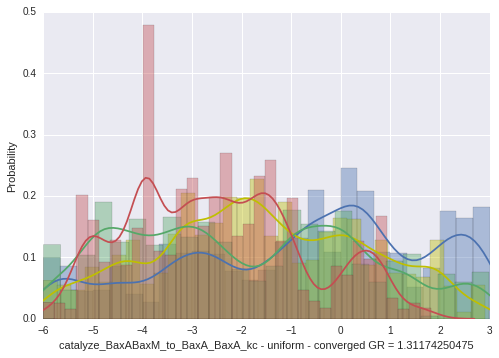

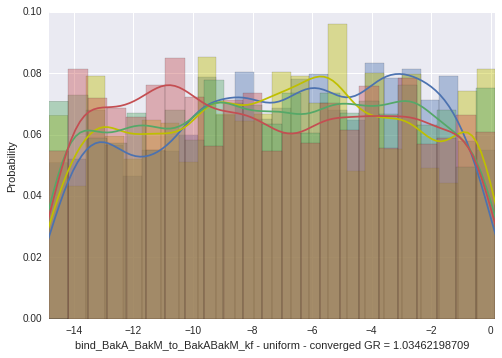

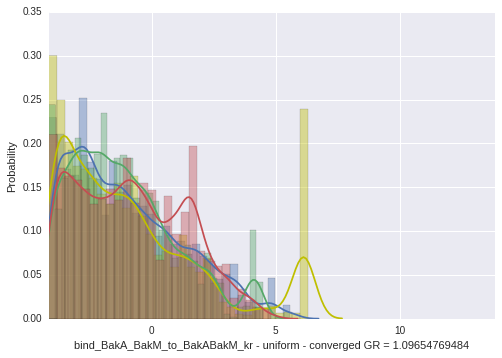

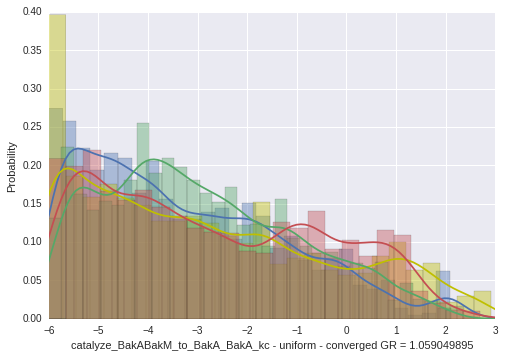

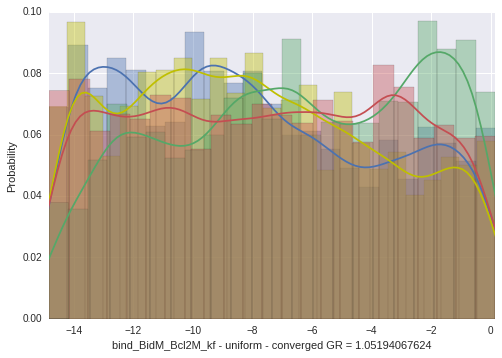

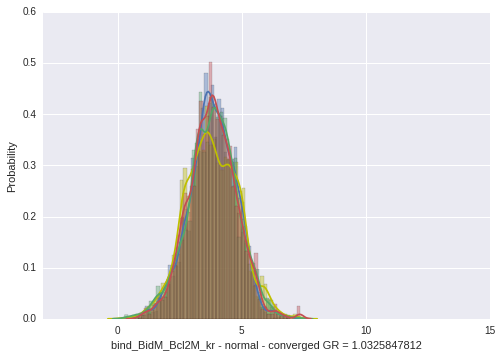

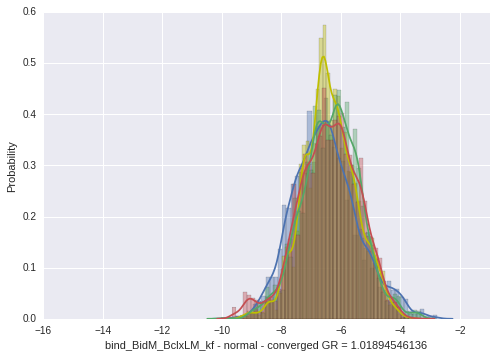

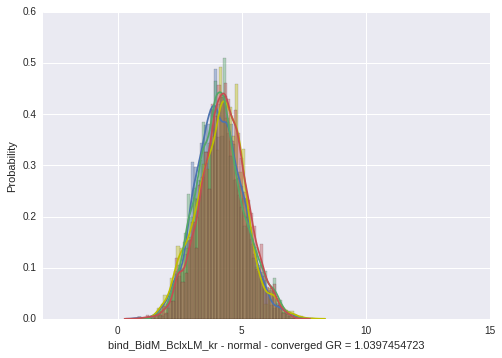

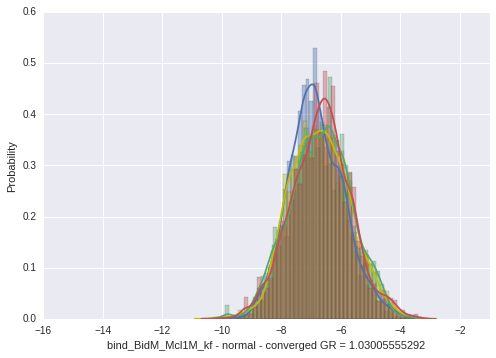

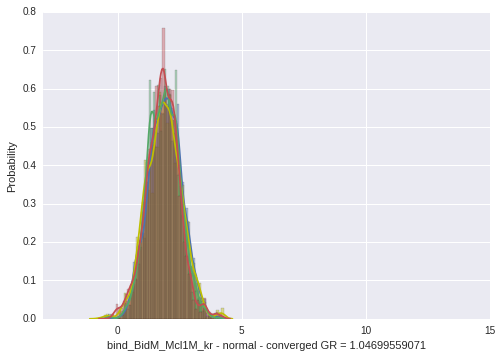

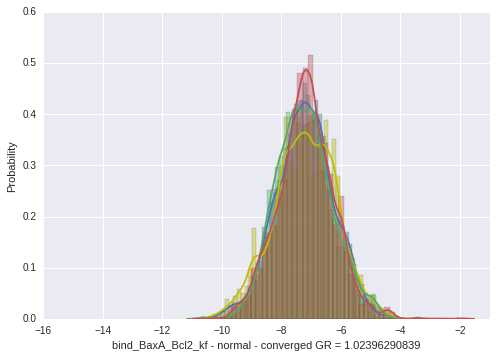

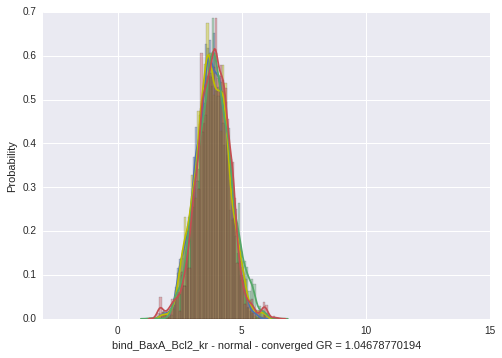

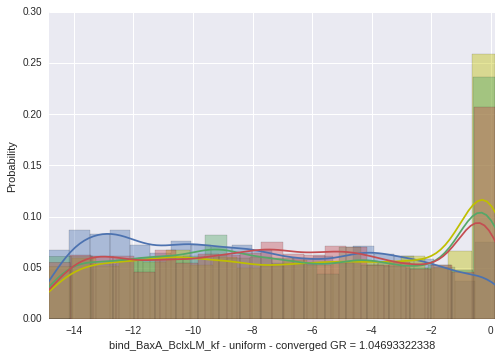

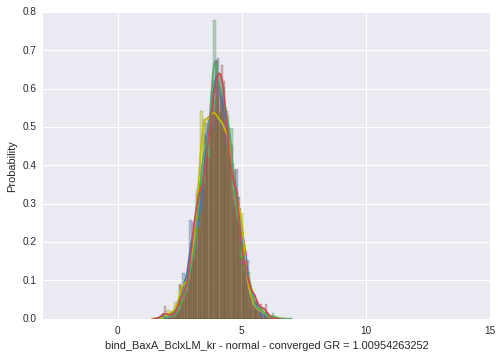

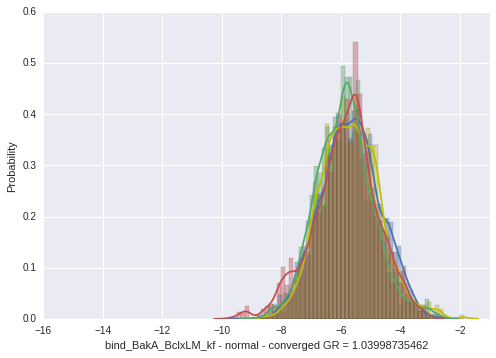

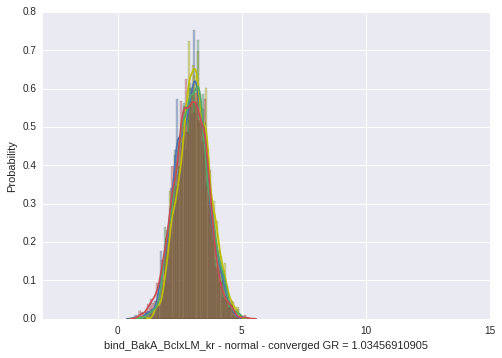

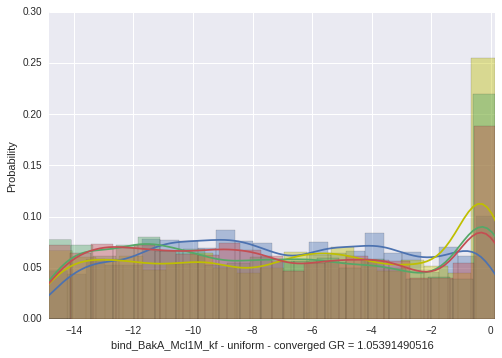

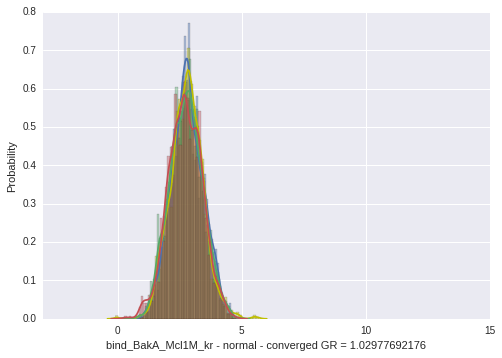

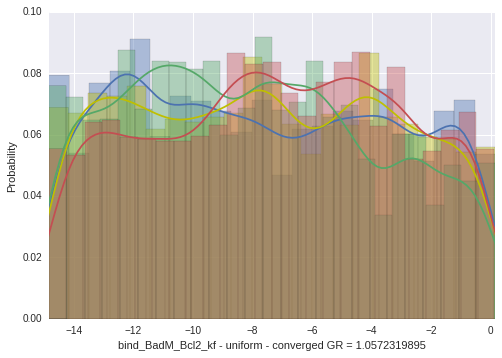

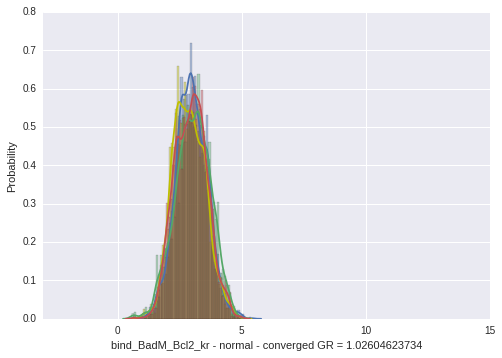

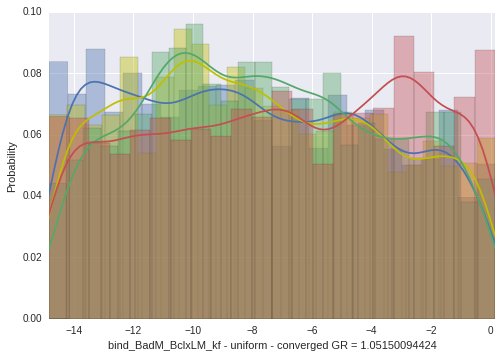

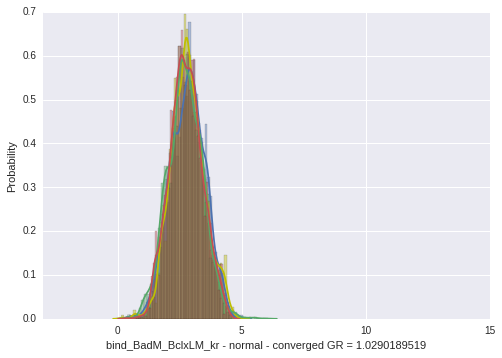

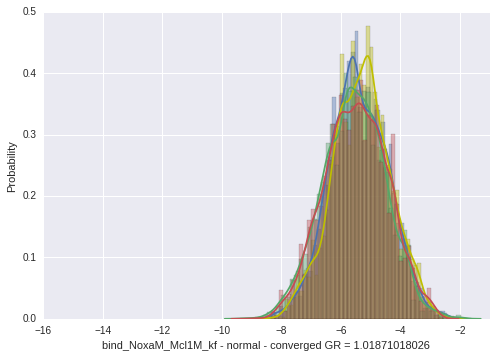

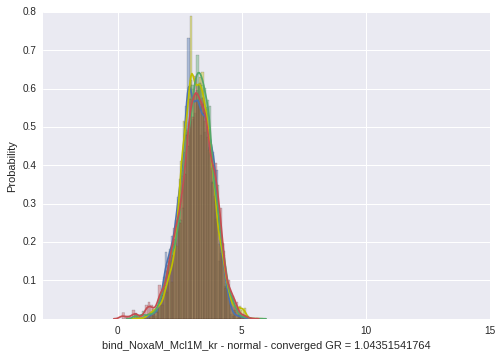

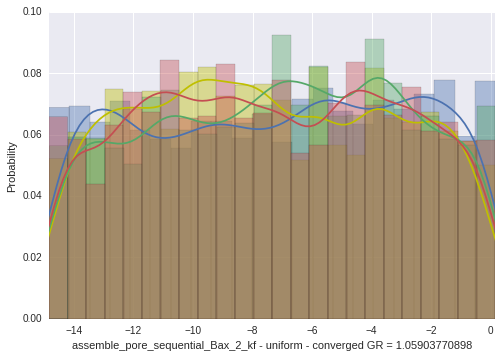

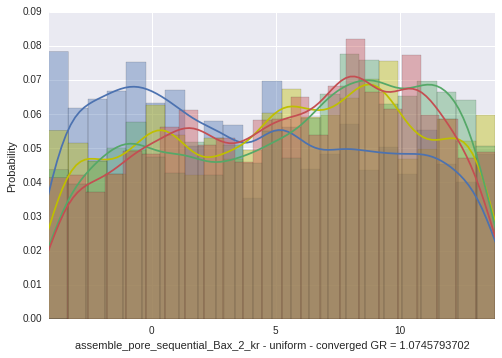

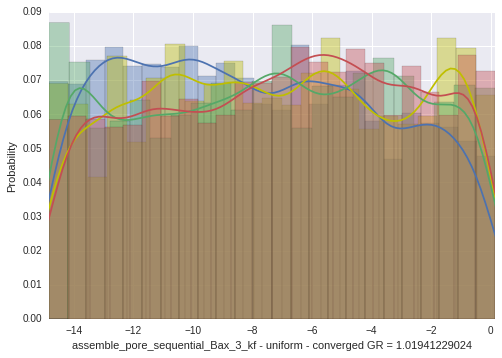

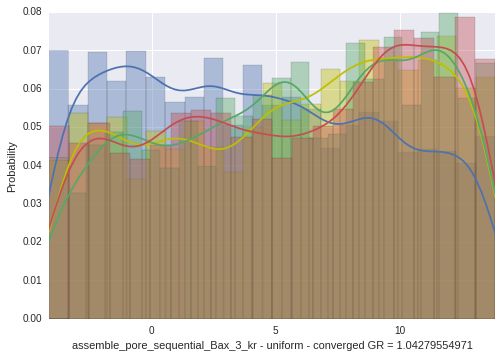

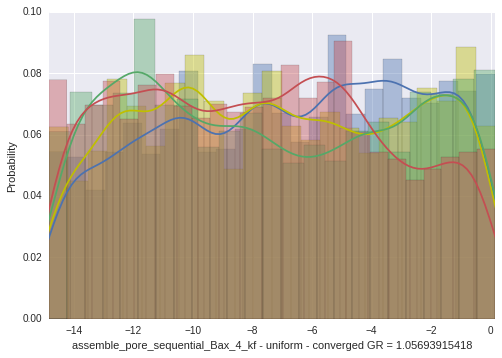

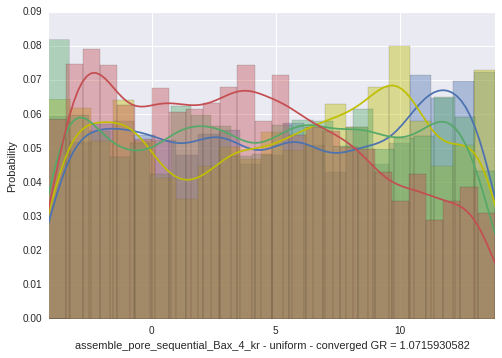

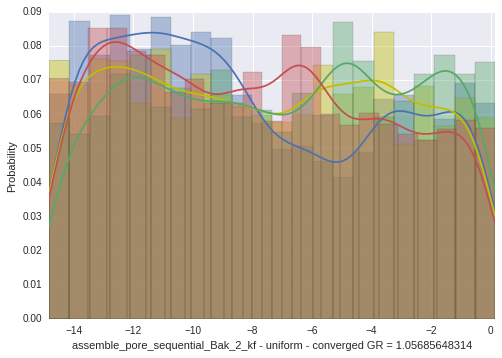

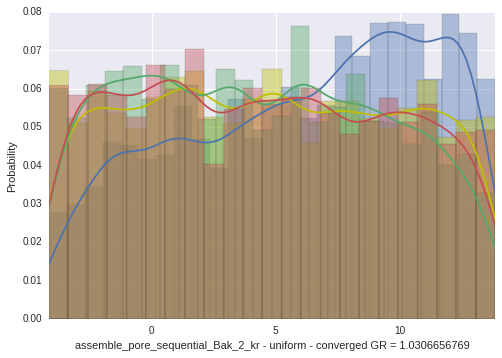

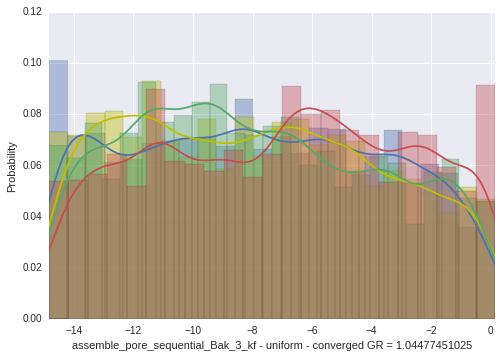

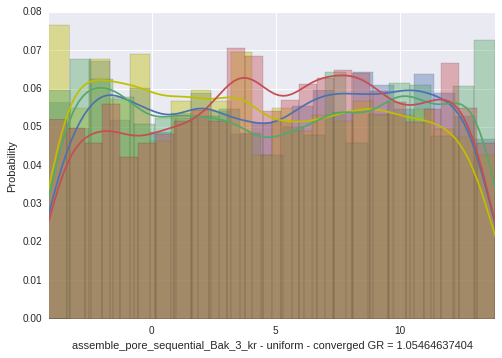

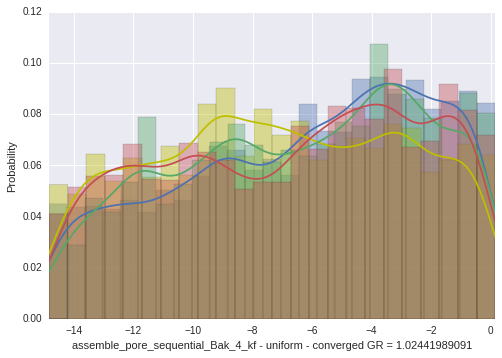

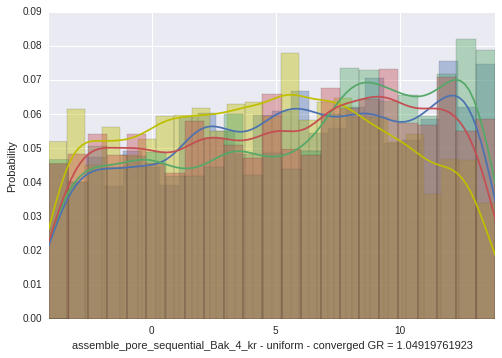

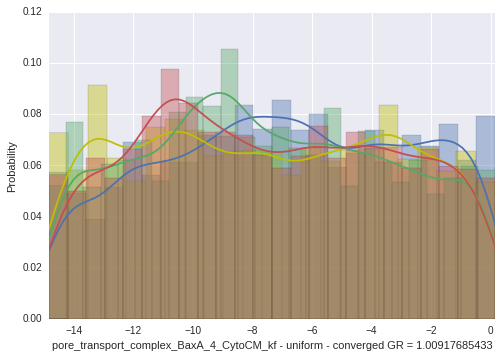

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True)
    sns.distplot(trace_arr_b[:,dim], hist=True, color='y')
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['b'][param_name] < 1.2:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - '+earm_rates[param_name]['type']+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    if earm_rates[param_name]['type'] == 'uniform':
        ax.set_xlim([earm_rates[param_name]['lower'], earm_rates[param_name]['upper']])
    elif 'kf' in param_name:
        ax.set_xlim([-16, -1])
    elif 'kr' in param_name:
        ax.set_xlim([-3, 15])
    elif 'kc' in param_name:
        ax.set_xlim([-6, 3])

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)

In [ ]:
os.chdir('/home/shockle/emcee')
from emcee import autocorr
autocorr.integrated_time(trace_arr_a)